In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
 df = pd.read_csv('data.csv')

In [7]:
df

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,05-02-2010,24924.50,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,05-02-2010,50605.27,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,05-02-2010,13740.12,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,05-02-2010,39954.04,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,05-02-2010,32229.38,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,421565,45,93,26-10-2012,2487.80,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420208,421566,45,94,26-10-2012,5203.31,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420209,421567,45,95,26-10-2012,56017.47,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420210,421568,45,97,26-10-2012,6817.48,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012


In [8]:
df.columns

Index(['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size',
       'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas', 'week', 'month',
       'year'],
      dtype='object')

In [9]:
df=df.drop(['Unnamed: 0','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5','Labor_Day'],axis=1)

In [10]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Super_Bowl,Thanksgiving,Christmas,week,month,year
0,1,1,05-02-2010,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
1,1,2,05-02-2010,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
2,1,3,05-02-2010,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
3,1,4,05-02-2010,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
4,1,5,05-02-2010,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,26-10-2012,2487.80,False,58.85,3.882,192.308899,8.667,B,118221,False,False,False,43,10,2012
420208,45,94,26-10-2012,5203.31,False,58.85,3.882,192.308899,8.667,B,118221,False,False,False,43,10,2012
420209,45,95,26-10-2012,56017.47,False,58.85,3.882,192.308899,8.667,B,118221,False,False,False,43,10,2012
420210,45,97,26-10-2012,6817.48,False,58.85,3.882,192.308899,8.667,B,118221,False,False,False,43,10,2012


In [11]:
df.shape

(420212, 17)

In [12]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Thanksgiving    0
Christmas       0
week            0
month           0
year            0
dtype: int64

In [13]:
df=df.dropna()
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Thanksgiving    0
Christmas       0
week            0
month           0
year            0
dtype: int64

In [14]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,week,month,year
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,171.212496,7.960000,136749.732787,25.828408,6.449866,2010.968454
std,12.787236,30.508819,22729.492116,18.447857,0.458519,39.162445,1.863879,60993.084568,14.152489,3.243397,0.796898
min,1.000000,1.000000,0.010000,-2.060000,2.472000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,182.350989,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,212.445487,8.567000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


In [15]:
df.loc[df['Weekly_Sales']<=0] #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Super_Bowl,Thanksgiving,Christmas,week,month,year


In [16]:
df.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Super_Bowl,Thanksgiving,Christmas,week,month,year
230468,24,59,01-04-2011,422.41,False,35.73,3.811,134.068258,8.212,A,203819,False,False,False,13,4,2011
341757,36,4,01-04-2011,10517.84,False,67.31,3.529,213.577670,8.300,A,39910,False,False,False,13,4,2011
341756,36,3,01-04-2011,358.20,False,67.31,3.529,213.577670,8.300,A,39910,False,False,False,13,4,2011
341755,36,2,01-04-2011,13759.47,False,67.31,3.529,213.577670,8.300,A,39910,False,False,False,13,4,2011
341754,36,1,01-04-2011,2064.56,False,67.31,3.529,213.577670,8.300,A,39910,False,False,False,13,4,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259353,27,60,31-12-2010,17.60,True,29.59,3.336,136.665265,8.021,A,204184,False,False,True,52,12,2010
259352,27,59,31-12-2010,10534.17,True,29.59,3.336,136.665265,8.021,A,204184,False,False,True,52,12,2010
259351,27,58,31-12-2010,1343.00,True,29.59,3.336,136.665265,8.021,A,204184,False,False,True,52,12,2010
259363,27,85,31-12-2010,3250.13,True,29.59,3.336,136.665265,8.021,A,204184,False,False,True,52,12,2010


In [17]:
df['Type'].unique() #Store varities

array(['A', 'B', 'C'], dtype=object)

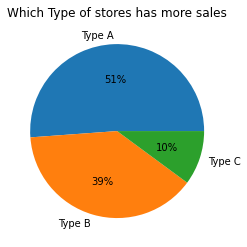

In [18]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
stores = ['Type A','Type B','Type C']

data = df['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

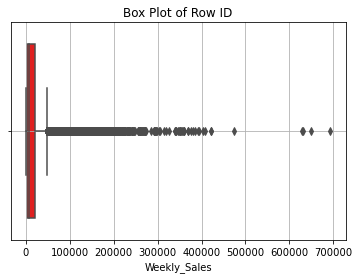

In [19]:
sns.boxplot(df['Weekly_Sales'],color="red")
plt.title("Box Plot of Row ID")
plt.grid(True)

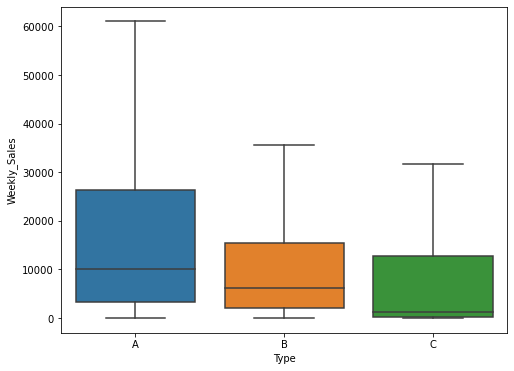

In [20]:

 ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=df, showfliers=False)


<AxesSubplot:ylabel='Frequency'>

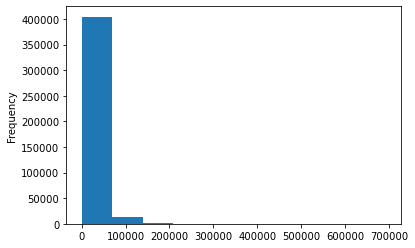

In [21]:
df["Weekly_Sales"].plot.hist()

<AxesSubplot:>

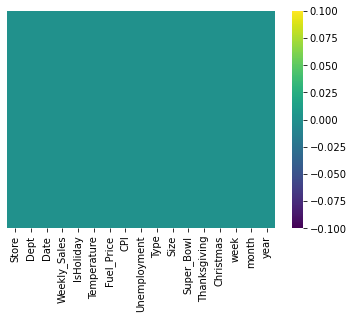

In [22]:
sns.heatmap(df.isnull(),yticklabels=False, cmap="viridis")

In [24]:
df['year'] = pd.DatetimeIndex(df['Date']).year #Separating year data.

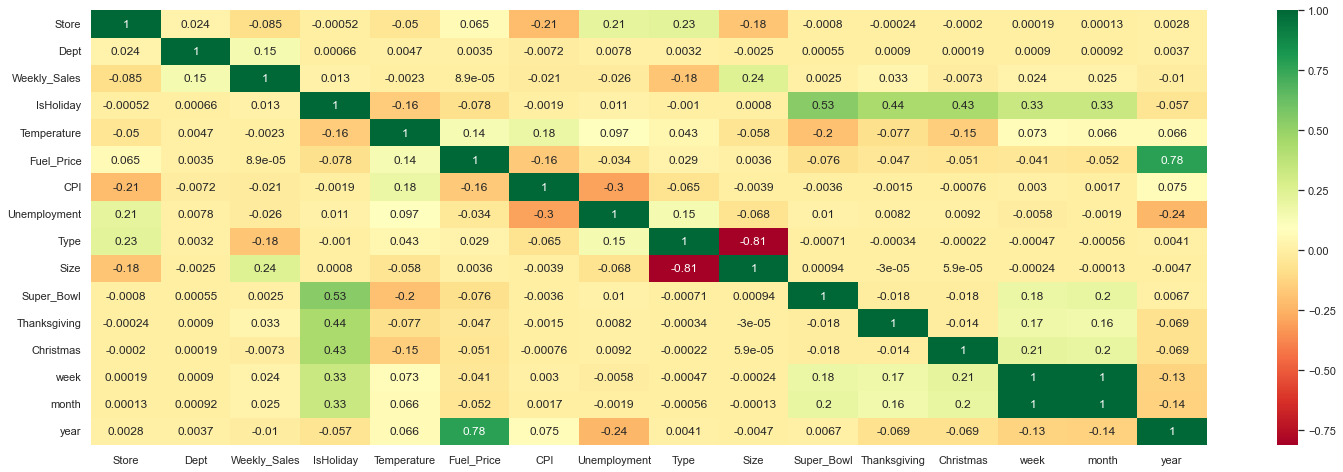

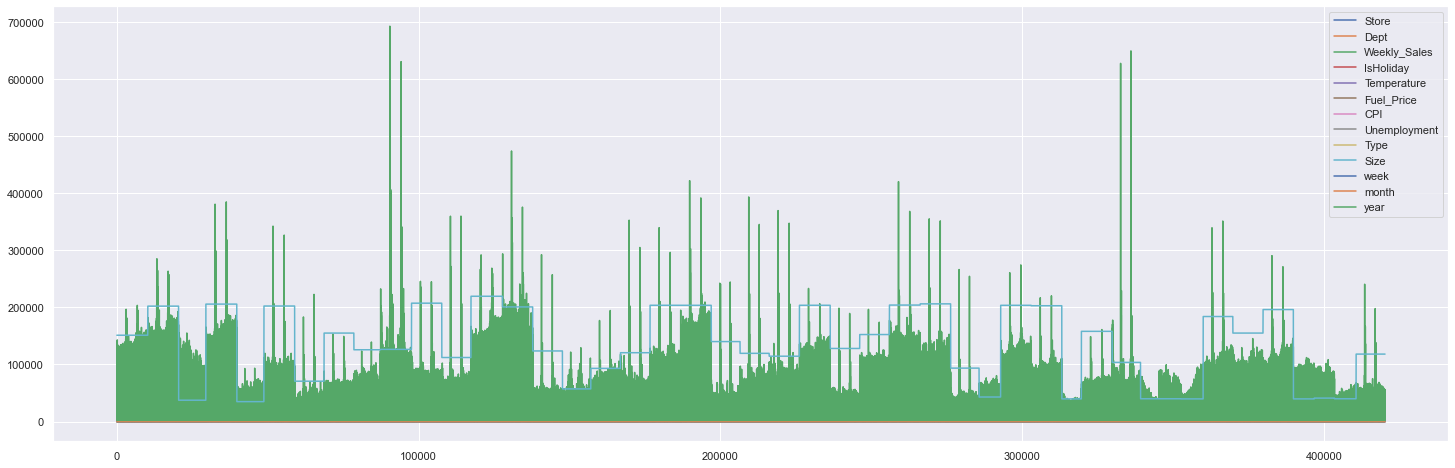

In [63]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# import file with data
data = df

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
#print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="RdYlGn", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})
df.plot()
# displaying heatmap
mp.show()

In [26]:
print(df.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
Super_Bowl         bool
Thanksgiving       bool
Christmas          bool
week              int64
month             int64
year              int64
dtype: object


In [27]:
# Year vs Fuel_price

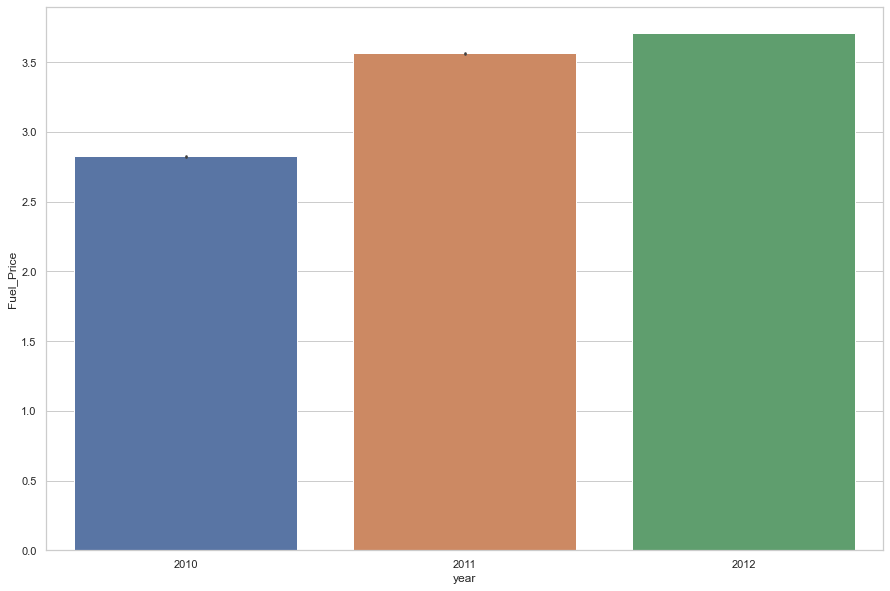

In [28]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips =df
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})


In [29]:
# Weekly sales vs Store

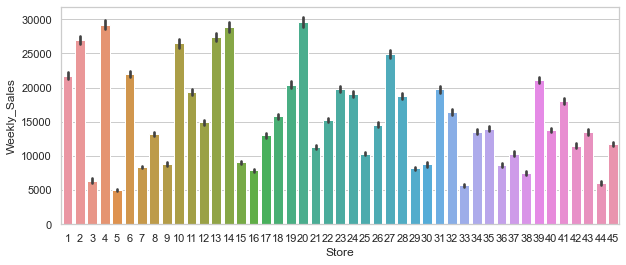

In [30]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = df
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)

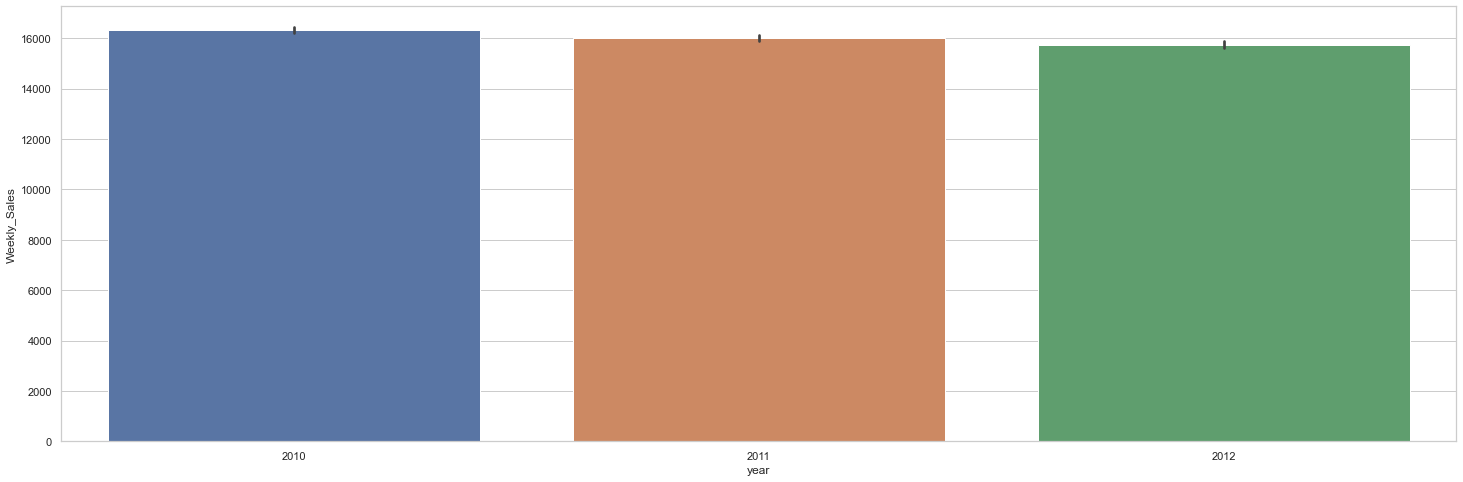

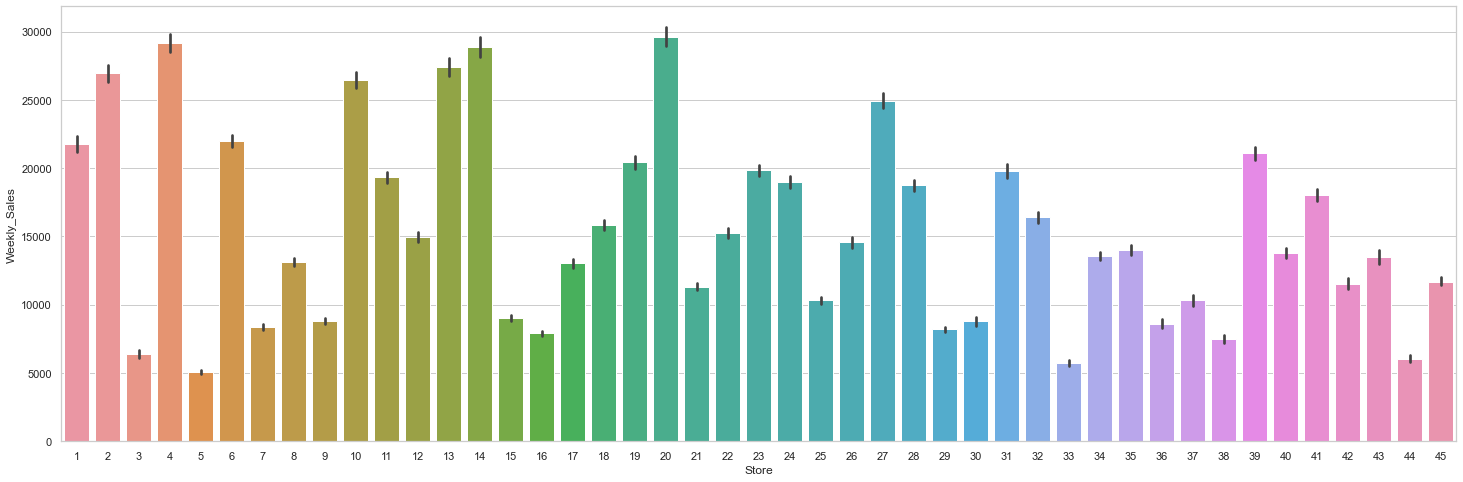

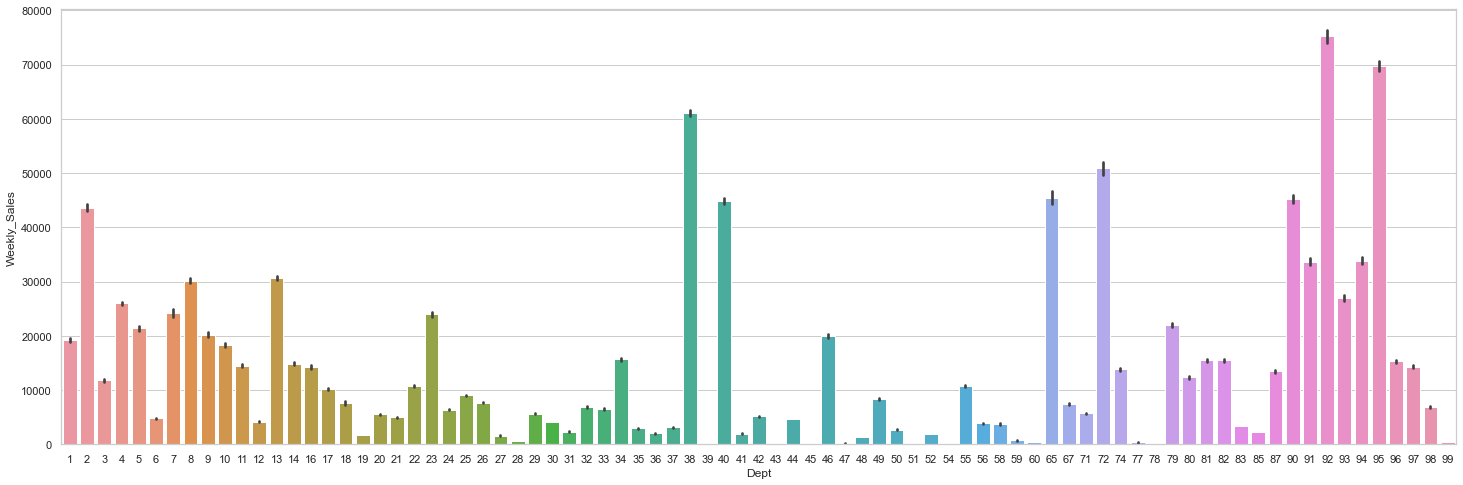

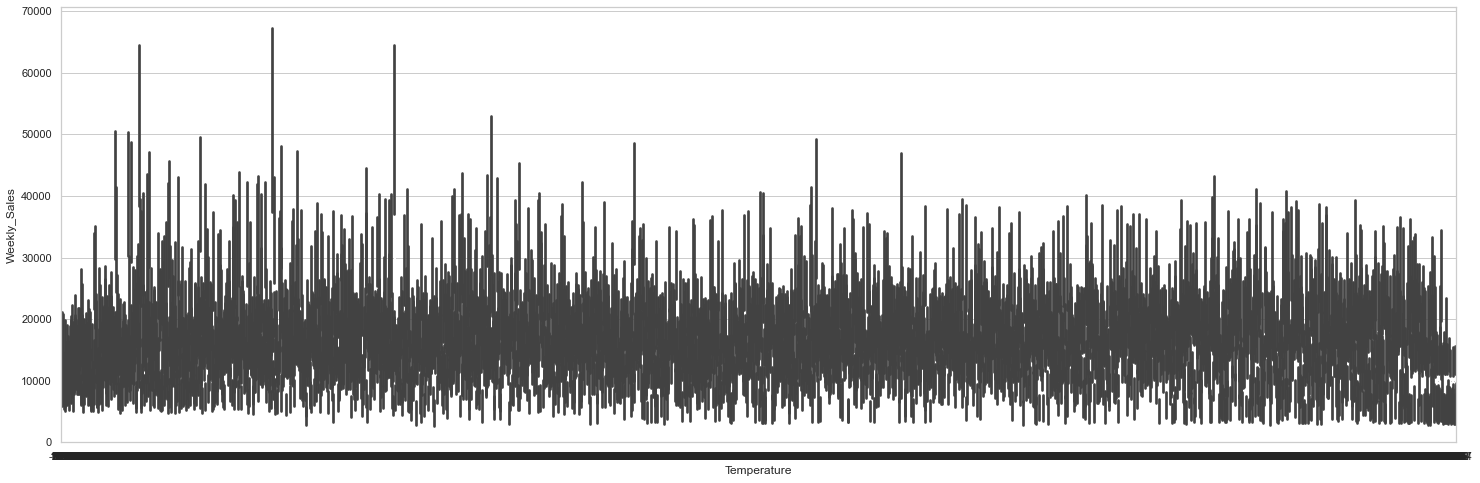

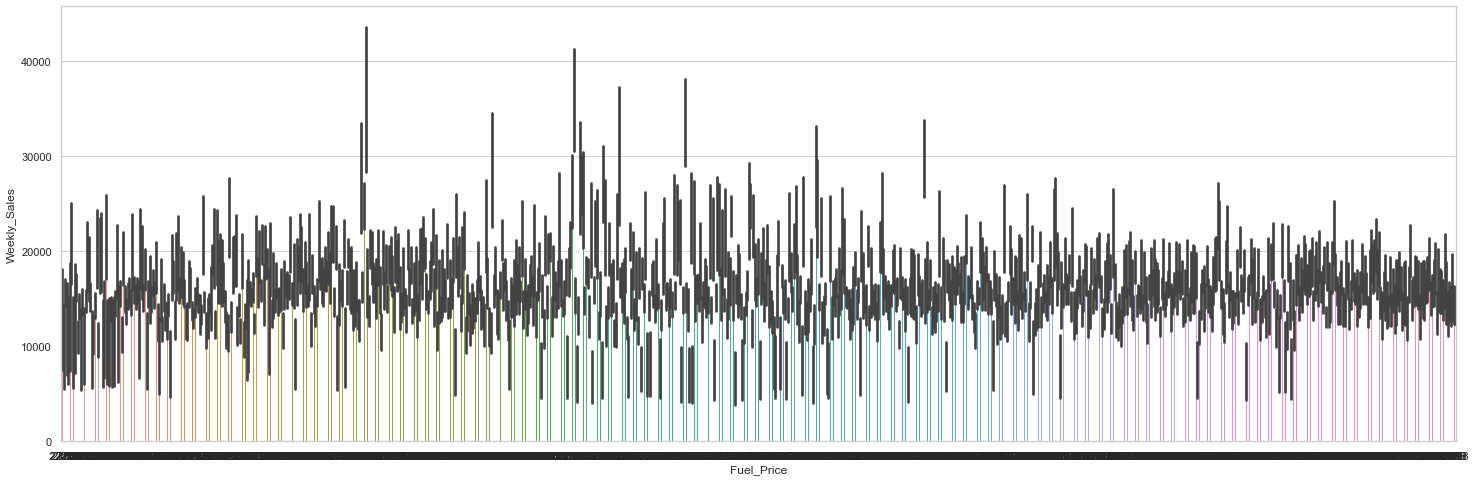

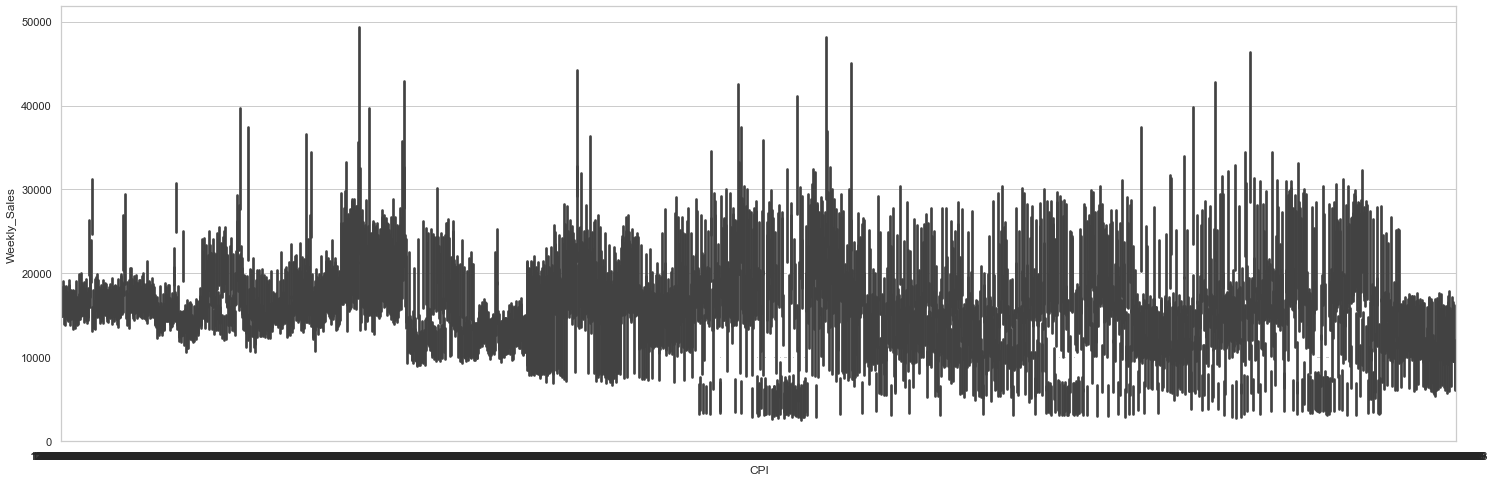

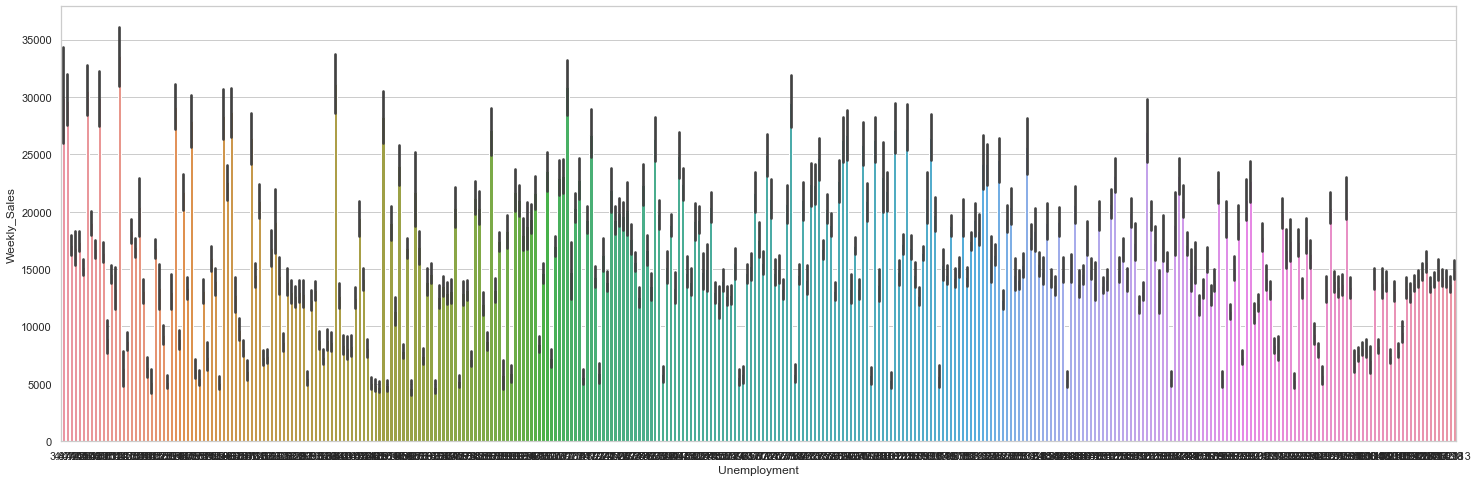

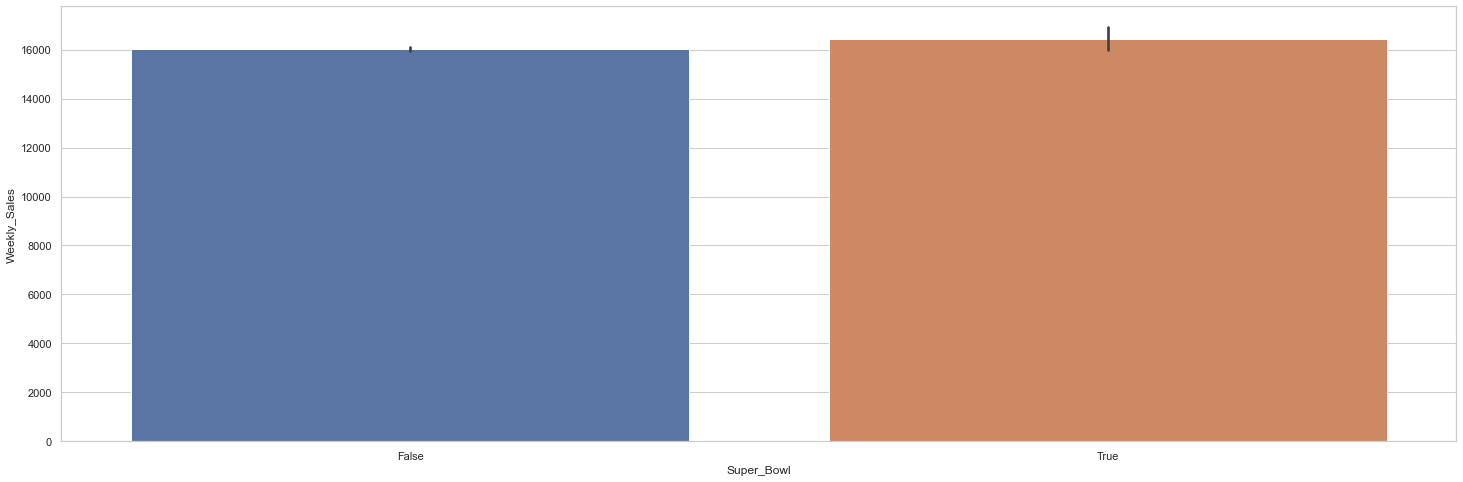

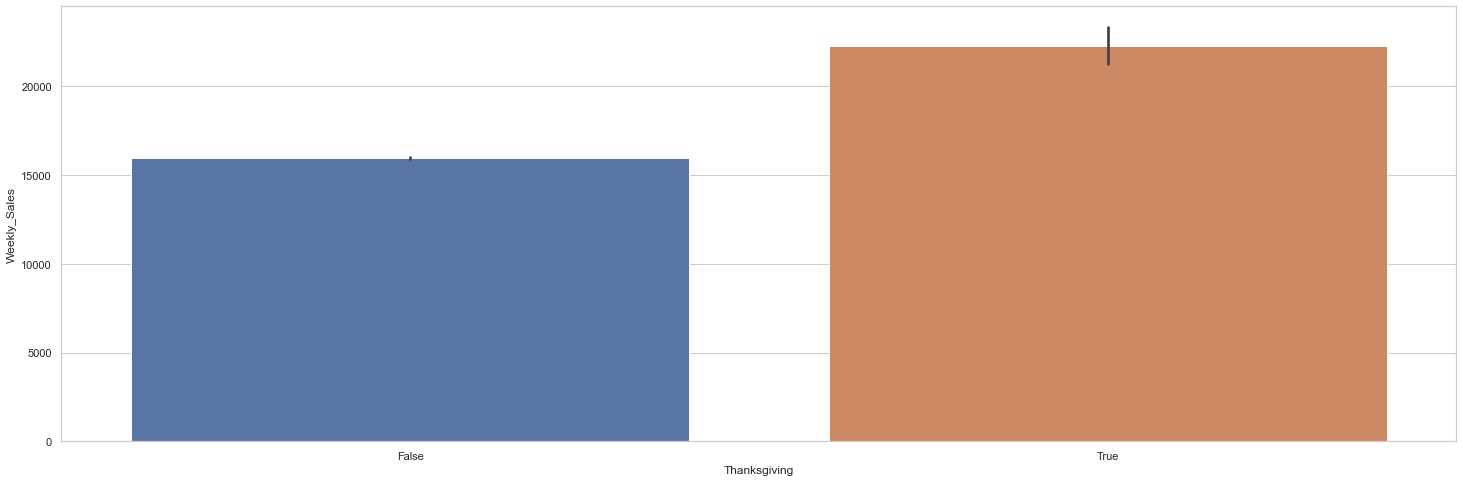

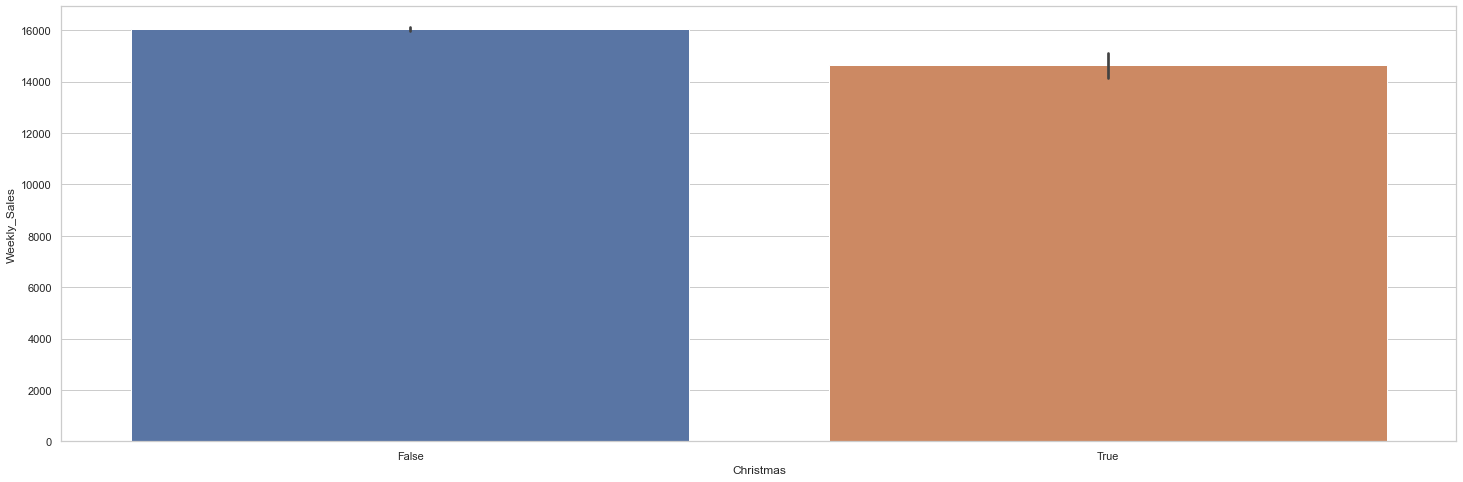

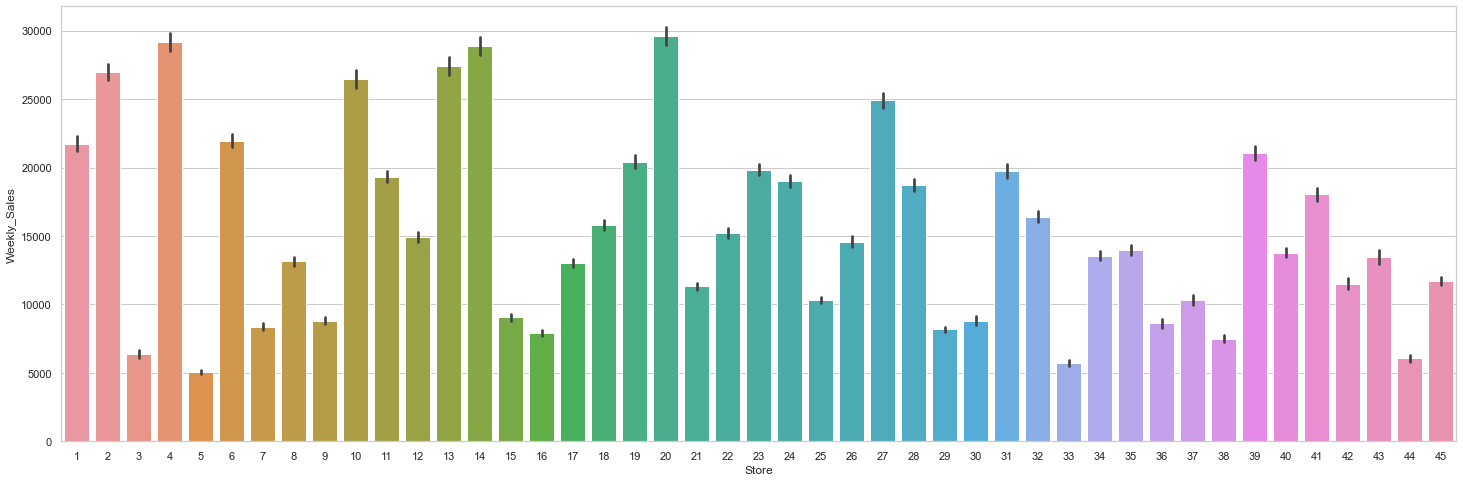

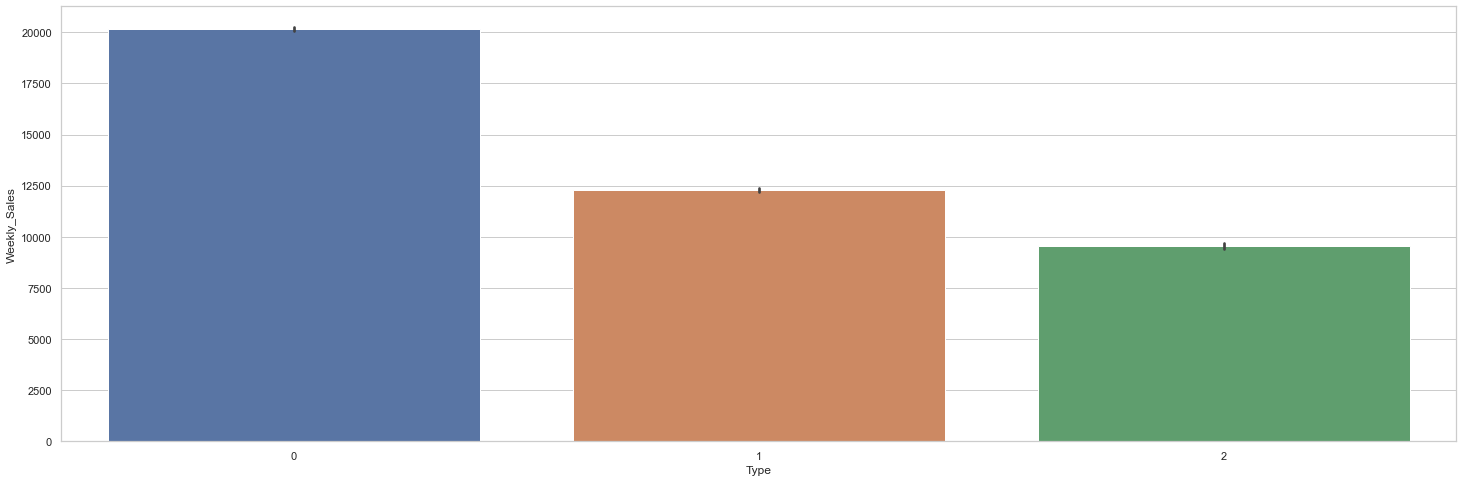

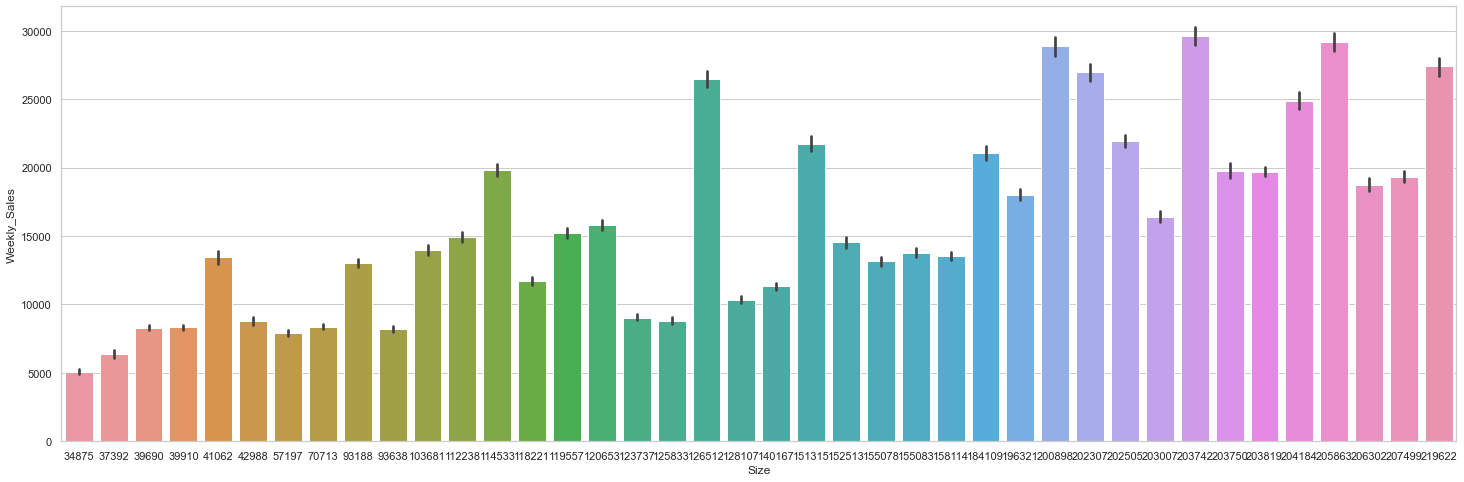

In [64]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = df
ax = sns.barplot(x='year', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Store', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Dept', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Temperature', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Fuel_Price', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='CPI', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Unemployment', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Super_Bowl', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Thanksgiving', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Christmas', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Store', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Type', y="Weekly_Sales", data=tips)
plt.show()
sns.barplot(x='Size', y="Weekly_Sales", data=tips)
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()


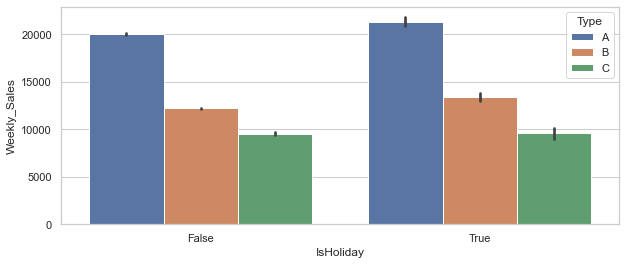

In [32]:
# one continous and two categorical variable

sns.barplot(df["IsHoliday"],df['Weekly_Sales'],hue= df["Type"])
plt.show()

In [33]:
#Store vs Unemployment

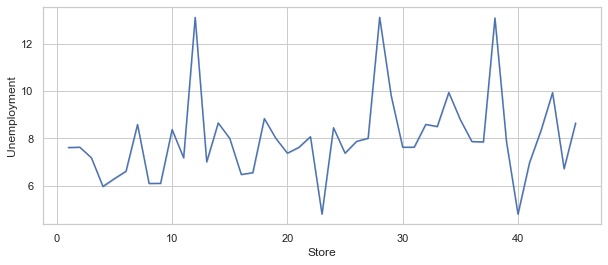

In [34]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = df

# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=data)
plt.show()

In [35]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Super_Bowl,Thanksgiving,Christmas,week,month,year
0,1,1,05-02-2010,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
1,1,2,05-02-2010,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
2,1,3,05-02-2010,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
3,1,4,05-02-2010,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
4,1,5,05-02-2010,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,26-10-2012,2487.80,False,58.85,3.882,192.308899,8.667,B,118221,False,False,False,43,10,2012
420208,45,94,26-10-2012,5203.31,False,58.85,3.882,192.308899,8.667,B,118221,False,False,False,43,10,2012
420209,45,95,26-10-2012,56017.47,False,58.85,3.882,192.308899,8.667,B,118221,False,False,False,43,10,2012
420210,45,97,26-10-2012,6817.48,False,58.85,3.882,192.308899,8.667,B,118221,False,False,False,43,10,2012


In [36]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

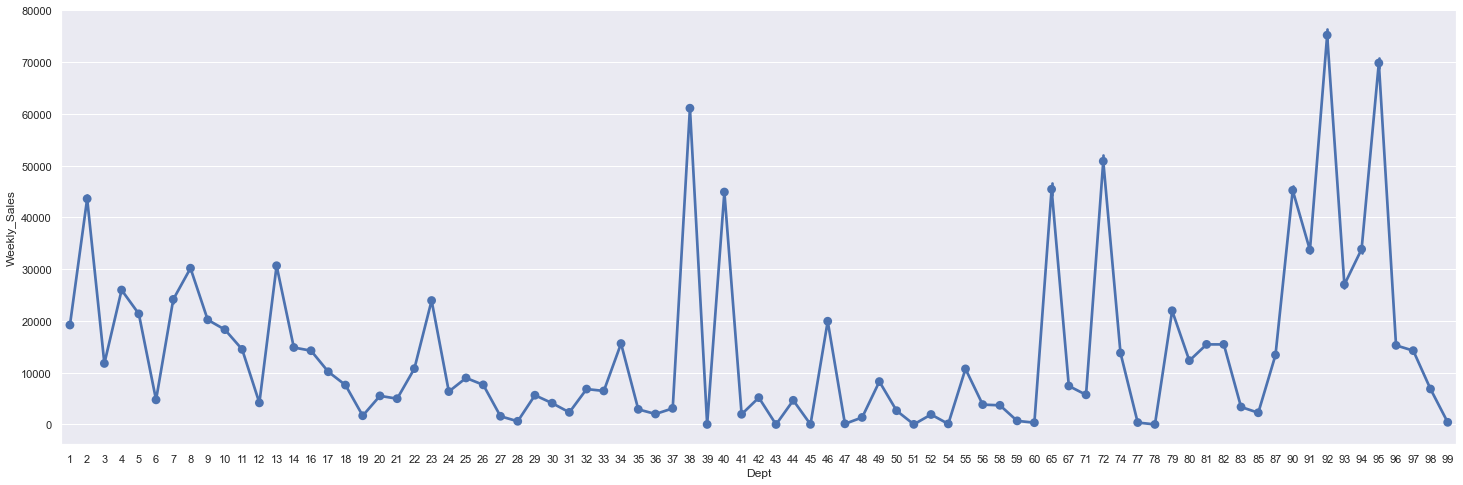

In [61]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data =df

# draw pointplot
sns.pointplot(x ='Dept',
			y = "Weekly_Sales",
			data = data)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()

In [38]:
df['month'] = pd.DatetimeIndex(df['Date']).month #extract month data

In [39]:
df['week'] = pd.DatetimeIndex(df['Date']).week #extract week data

In [40]:
df=df.drop(['Date'],axis=1)

<AxesSubplot:xlabel='month'>

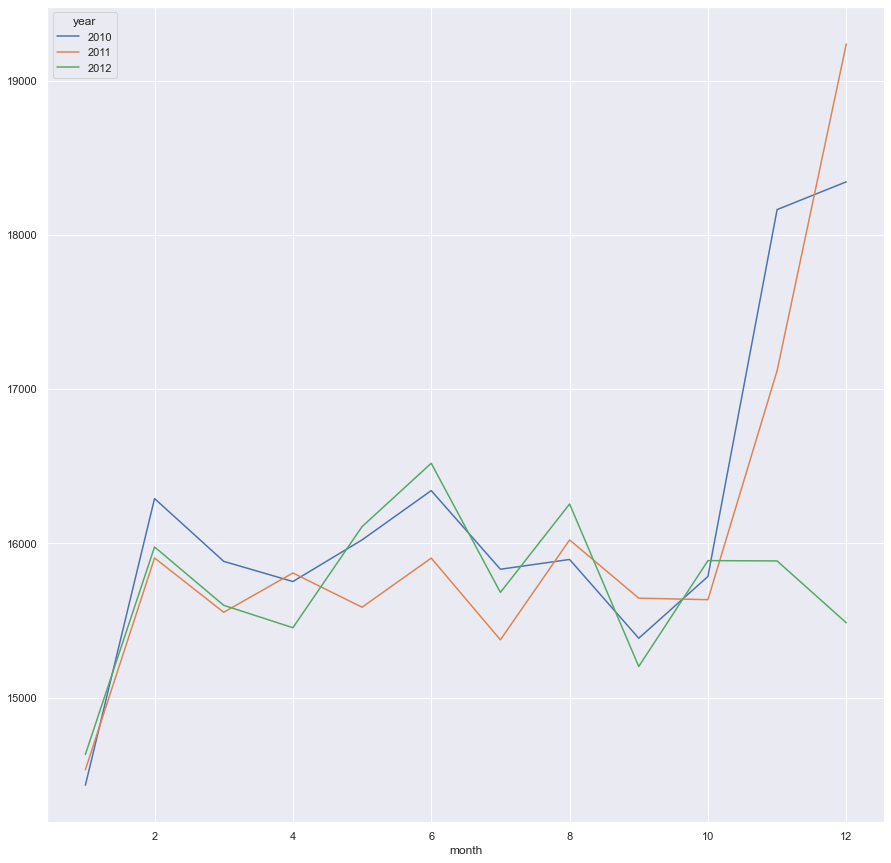

In [41]:
month_wise_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

In [42]:
# Label encoding for Holiday column and Type

In [43]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['IsHoliday']= label_encoder.fit_transform(df['IsHoliday'])
df['Type']= label_encoder.fit_transform(df['Type'])

df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Super_Bowl,Thanksgiving,Christmas,week,month,year
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,False,False,False,17,5,2010
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,0,151315,False,False,False,17,5,2010
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,0,151315,False,False,False,17,5,2010
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,0,151315,False,False,False,17,5,2010
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,0,151315,False,False,False,17,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,2487.80,0,58.85,3.882,192.308899,8.667,1,118221,False,False,False,43,10,2012
420208,45,94,5203.31,0,58.85,3.882,192.308899,8.667,1,118221,False,False,False,43,10,2012
420209,45,95,56017.47,0,58.85,3.882,192.308899,8.667,1,118221,False,False,False,43,10,2012
420210,45,97,6817.48,0,58.85,3.882,192.308899,8.667,1,118221,False,False,False,43,10,2012


In [44]:
# correlation Map2

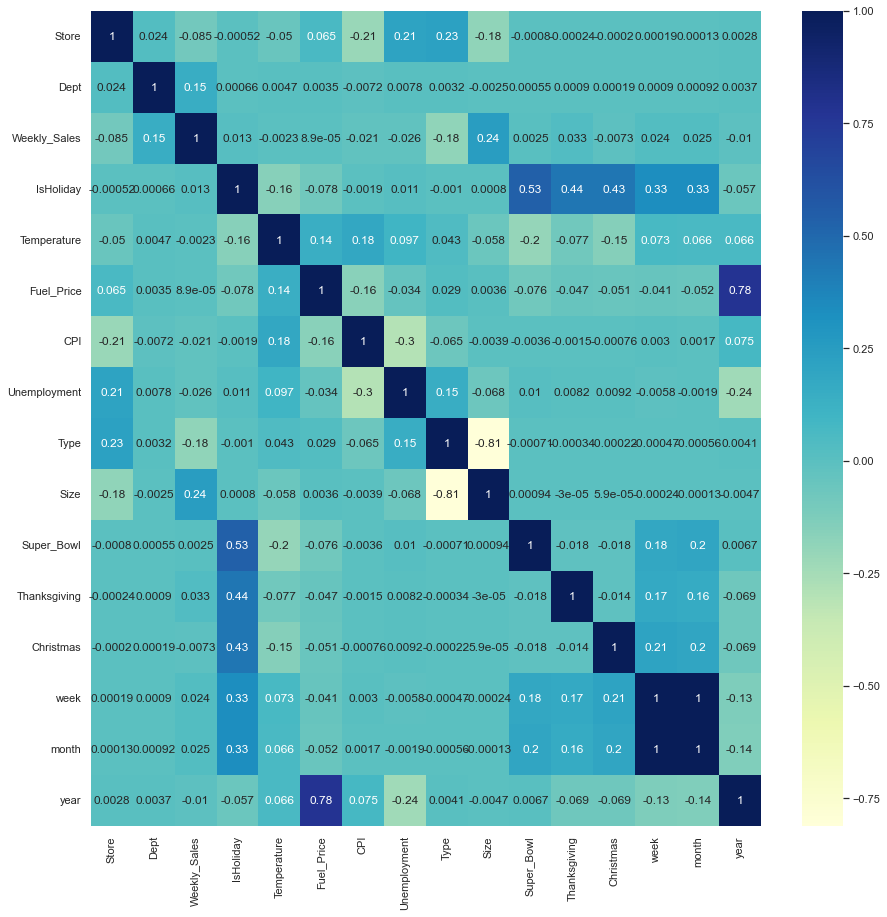

In [45]:
data = df

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
#print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

In [46]:
#to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,week,month,year
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,0.070345,60.090599,3.360890,171.212496,7.960000,0.589500,136749.732787,26.014048,6.478694,2010.968454
std,12.787236,30.508819,22729.492116,0.255729,18.447857,0.458519,39.162445,1.863879,0.666407,60993.084568,14.525384,3.324678,0.796898
min,1.000000,1.000000,0.010000,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2120.130000,0.000000,46.680000,2.933000,132.022667,6.891000,0.000000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7661.700000,0.000000,62.090000,3.452000,182.350989,7.866000,0.000000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20271.265000,0.000000,74.280000,3.738000,212.445487,8.567000,1.000000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,227.232807,14.313000,2.000000,219622.000000,52.000000,12.000000,2012.000000


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [48]:
#Splitting the dataset
X = df.drop( ['Type'], axis = 1)
Y = df['Type']

In [49]:
#Splitting the data as the trainning & testing as 70-30
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.7, test_size = 0.3, random_state=2)
#x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [50]:
X_train.info()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294148 entries, 137759 to 351400
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         294148 non-null  int64  
 1   Dept          294148 non-null  int64  
 2   Weekly_Sales  294148 non-null  float64
 3   IsHoliday     294148 non-null  int64  
 4   Temperature   294148 non-null  float64
 5   Fuel_Price    294148 non-null  float64
 6   CPI           294148 non-null  float64
 7   Unemployment  294148 non-null  float64
 8   Size          294148 non-null  int64  
 9   Super_Bowl    294148 non-null  bool   
 10  Thanksgiving  294148 non-null  bool   
 11  Christmas     294148 non-null  bool   
 12  week          294148 non-null  int64  
 13  month         294148 non-null  int64  
 14  year          294148 non-null  int64  
dtypes: bool(3), float64(5), int64(7)
memory usage: 30.0 MB


In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126064 entries, 367318 to 91091
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         126064 non-null  int64  
 1   Dept          126064 non-null  int64  
 2   Weekly_Sales  126064 non-null  float64
 3   IsHoliday     126064 non-null  int64  
 4   Temperature   126064 non-null  float64
 5   Fuel_Price    126064 non-null  float64
 6   CPI           126064 non-null  float64
 7   Unemployment  126064 non-null  float64
 8   Size          126064 non-null  int64  
 9   Super_Bowl    126064 non-null  bool   
 10  Thanksgiving  126064 non-null  bool   
 11  Christmas     126064 non-null  bool   
 12  week          126064 non-null  int64  
 13  month         126064 non-null  int64  
 14  year          126064 non-null  int64  
dtypes: bool(3), float64(5), int64(7)
memory usage: 12.9 MB


In [52]:
#Splitting the data as the trainning & testing as 70-30
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=2)

In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126064 entries, 367318 to 91091
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         126064 non-null  int64  
 1   Dept          126064 non-null  int64  
 2   Weekly_Sales  126064 non-null  float64
 3   IsHoliday     126064 non-null  int64  
 4   Temperature   126064 non-null  float64
 5   Fuel_Price    126064 non-null  float64
 6   CPI           126064 non-null  float64
 7   Unemployment  126064 non-null  float64
 8   Size          126064 non-null  int64  
 9   Super_Bowl    126064 non-null  bool   
 10  Thanksgiving  126064 non-null  bool   
 11  Christmas     126064 non-null  bool   
 12  week          126064 non-null  int64  
 13  month         126064 non-null  int64  
 14  year          126064 non-null  int64  
dtypes: bool(3), float64(5), int64(7)
memory usage: 12.9 MB


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
mse_knr=metrics.mean_squared_error(y_test,y_pred_knr)
print(mse_knr)
r2knr = metrics.r2_score(y_test, y_pred_knr)
print(r2knr)
accuracy = knr.score(X_train, y_train)

0.06227987371493844
0.8596758887138743


In [56]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf=metrics.mean_squared_error(y_test,y_pred_rf)
print(mse_rf)
r2rf = metrics.r2_score(y_test, y_pred_rf)
print(r2rf)


0.0
1.0


In [58]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt=metrics.mean_squared_error(y_test,y_pred_dt)
print(mse_dt)
r2dt = metrics.r2_score(y_test, y_pred_dt)
print(r2dt)

0.0
1.0


In [59]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
Y_pred_gbr = gbr.predict(X_test)
mse_gbr=metrics.mean_squared_error(y_test,Y_pred_gbr)
print(mse_gbr)
r2gbr = metrics.r2_score(y_test, Y_pred_gbr)
print(r2gbr)

0.00016652486590356674
0.9996247992742902


In [60]:
print("*"*10, "R2 score", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2knr)
print("K nearest neighbors: ",mse_knr)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("random forest: ",mse_rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("decision tree: ",mse_dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2gbr)
print("gradient boosting: ",mse_gbr)
print("-"*30)

********** R2 score **********
------------------------------
K nearest neighbors:  0.8596758887138743
K nearest neighbors:  0.06227987371493844
------------------------------
------------------------------
random forest:  1.0
random forest:  0.0
------------------------------
------------------------------
decision tree:  1.0
decision tree:  0.0
------------------------------
------------------------------
gradient boosting:  0.9996247992742902
gradient boosting:  0.00016652486590356674
------------------------------


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


df['IsHoliday'] = df['Weekly_Sales']

# Add the year, month, and day columns to the dataframe
df['Year'] = df.year
df['Month'] = df.month
df['Week'] = df.week
# Split the data into a training set and a testing set
x_train, x_test, y_train,y_test = train_test_split(df.drop('Weekly_Sales', axis=1), df['Weekly_Sales'], test_size=0.2)

# Train a linear regression model on the training data
model = RandomForestRegressor()
model.fit(x_train[['Year','Month', 'Week']], y_train)
# Evaluate the model on the testing data
print(f"Accuracy: {model.score(x_test[['Year','Month', 'Week']], y_test)}")
plt.show()

